In [20]:
ROOT_DIR = '/code/premier-league-match-predictions'

import sys, os
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from src.config import Models, END_YEAR, NUM_SEASONS, SPORTSBOOK, N_MATCHES
from src.data.load_data import load_all_seasons
from src.data.scrape_values import merge_valuations_into_dataframe
from src.data.scrape_possession import merge_possession_into_dataframe
from src.data.build_features import build_rolling_features
from src.data.split import chrono_split
from src.models.train_model import train

In [21]:
def plot_accuracy_vs_n(label: str):
    df_raw = load_all_seasons(end_year=END_YEAR, num_seasons=NUM_SEASONS, sportsbook=SPORTSBOOK)
    df_raw = merge_possession_into_dataframe(df_raw)
    df_raw = merge_valuations_into_dataframe(df_raw, "data/raw/tm_pl_all_columns.csv", "2015-07-01")
    
    # Create several DataFrames using rolling features of different window sizes for
    # computing for statistics.
    n_to_test = np.arange(1, 11)
    
    # Store highest_accuracies per model
    highest_accuracies = dict()

    # Store history to avoid repeating computations
    history = []
    
    plt.figure()
    
    for model_type in Models:
        accuracies = []
        print(f'>>> Training {model_type.name.lower()}:')
        for n in n_to_test:
            print(f'\t- N_MATCHES={n}')
            df = build_rolling_features(df=df_raw, n_matches=n)
            
            # Use a 70-30 chronological train-test split.
            X_train, y_train, X_test, y_test = chrono_split(df, train_ratio=0.7)
            
            # Train the model based on what type of model the user configured.
            model = train(model_type, X_train, y_train)
            
            # Evaluate the model based on the holdout set.
            y_pred = model.predict(X_test)
            
            accuracies.append(accuracy_score(y_test, y_pred))
        
        history.append(accuracies)
        print(f'The highest accuracy was {max(accuracies)}.')
        highest_accuracies[model_type] = max(accuracies)
        plt.plot(n_to_test, accuracies, 'o-', label=model_type.name.lower())
        
    plt.xlabel('Number of Games Used to Compute Form Statistics')
    plt.ylabel('Model Accuracy')
    plt.title(f'Accuracy vs. N_MATCHES: NUM_SEASONS={NUM_SEASONS}')
    plt.legend()
    plt.savefig(f'plots/accuracy_vs_n_{NUM_SEASONS}_seasons{label}.png')
    plt.show()

    return history, highest_accuracies

>>> Training logistic_regression:
	- N_MATCHES=1
	- N_MATCHES=2
	- N_MATCHES=3
	- N_MATCHES=4
	- N_MATCHES=5
	- N_MATCHES=6
	- N_MATCHES=7
	- N_MATCHES=8
	- N_MATCHES=9
	- N_MATCHES=10
The highest accuracy was 0.5905861456483126.
>>> Training xgboost:
	- N_MATCHES=1
	- N_MATCHES=2
	- N_MATCHES=3
	- N_MATCHES=4
	- N_MATCHES=5
	- N_MATCHES=6
	- N_MATCHES=7
	- N_MATCHES=8
	- N_MATCHES=9
	- N_MATCHES=10
The highest accuracy was 0.5817051509769094.
>>> Training random_forest:
	- N_MATCHES=1
	- N_MATCHES=2
	- N_MATCHES=3
	- N_MATCHES=4
	- N_MATCHES=5
	- N_MATCHES=6
	- N_MATCHES=7
	- N_MATCHES=8
	- N_MATCHES=9
	- N_MATCHES=10
The highest accuracy was 0.5825932504440497.
>>> Training svm:
	- N_MATCHES=1
	- N_MATCHES=2
	- N_MATCHES=3
	- N_MATCHES=4
	- N_MATCHES=5
	- N_MATCHES=6
	- N_MATCHES=7
	- N_MATCHES=8
	- N_MATCHES=9
	- N_MATCHES=10
The highest accuracy was 0.5248667850799289.
>>> Training mlpffnn:
	- N_MATCHES=1
	- N_MATCHES=2
	- N_MATCHES=3
	- N_MATCHES=4
	- N_MATCHES=5
	- N_MATCHES=6
	-

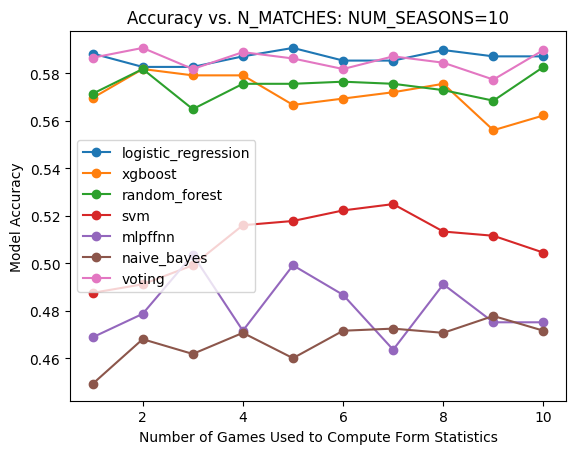

Exception ignored in: <function ResourceTracker.__del__ at 0x7aa367194f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x797196f98f40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7cce28488f40>
Traceback (most recent call last):
  File "/usr

In [22]:
tuned_history, tuned_highest_accuracies = plot_accuracy_vs_n('_tuned')

In [26]:
for model in highest_accuracies:
    print(f'{model}: Highest test accuracy is {highest_accuracies[model]:.4f}.')

NameError: name 'highest_accuracies' is not defined